In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('2025_Airbnb_NYC.csv', encoding = 'utf-8' )

df

In [10]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'source', 'name', 'description',
       'neighborhood_overview', 'host_id', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
     

In [13]:
df['price_clean'] = df['price'].str.replace(r'[\$,]', '', regex=True)
df['price_clean'] = df['price_clean'].astype(float)
print(df['price_clean'].head(2))
df['price'] = df['price_clean']
df = df.drop(columns=['price_clean'])

0    200.0
1     82.0
Name: price_clean, dtype: float64


In [20]:
stats_review = df.groupby('room_type')['review_scores_rating'].describe()
stats_review

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,8873.0,4.739607,0.430769,1.0,4.670,4.860,5.00,5.0
Hotel room,114.0,4.433509,0.750488,1.0,4.115,4.645,5.00,5.0
Private room,6466.0,4.707533,0.484216,1.0,4.650,4.830,4.98,5.0
Shared room,57.0,4.848070,0.119589,4.6,4.780,4.860,4.94,5.0


In [21]:
stats_price = df.groupby('room_type')['price'].describe()
stats_price

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,12664.0,265.344757,412.451932,16.0,128.0,190.0,300.0,15200.0
Hotel room,372.0,527.634409,527.342594,8.0,224.0,403.0,790.0,6563.0
Private room,9186.0,130.763009,427.908249,7.0,56.0,81.0,128.0,20000.0
Shared room,86.0,144.662791,252.594379,14.0,38.0,79.0,150.0,2025.0


In [22]:
stats_revenue_ori = df.groupby('room_type')['estimated_revenue_l365d'].describe()
stats_revenue_ori

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,12664.0,14778.052274,28652.352049,0.0,0.0,0.0,20760.0,1020050.0
Hotel room,372.0,3893.244624,11923.669595,0.0,0.0,0.0,0.0,94786.0
Private room,9186.0,8281.467995,15730.560203,0.0,0.0,0.0,10800.0,374524.0
Shared room,86.0,9735.976744,30479.879570,0.0,0.0,0.0,12592.5,268005.0


In [23]:
df_nonzero = df[df['estimated_revenue_l365d'] != 0]
stats_revenue = df_nonzero.groupby('room_type')['estimated_revenue_l365d'].describe()
stats_revenue

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,5840.0,32046.105137,35027.644990,1521.0,12420.0,22950.0,40290.00,1020050.0
Hotel room,77.0,18808.922078,20243.366000,1170.0,5603.0,10608.0,25760.00,94786.0
Private room,4121.0,18459.976947,19071.388646,715.0,5520.0,12800.0,25272.00,374524.0
Shared room,36.0,23258.166667,43962.617722,1920.0,7254.0,14212.5,19826.25,268005.0


In [16]:
weird = df[df['price'] == 20000.0]
print(weird)

       Unnamed: 0            id       source  \
14131       27925  9.045239e+17  city scrape   
14132       27926  9.045241e+17  city scrape   
14133       27927  9.045242e+17  city scrape   

                                     name  \
14131       1-Bedroom Hotel Suite - 1 bed   
14132  2 Connecting Hotel Suites - 2 beds   
14133      1-Bedroom Hotel Suite - 2 beds   

                                             description  \
14131  The 640 square foot Howard Suite at 11 Howard ...   
14132  The 640 square foot Howard Suite at 11 Howard ...   
14133  Revel in a private, rooftop terrace with views...   

      neighborhood_overview    host_id  host_name  host_since host_location  \
14131                   NaN  326084746  Suiteness  2020-01-10   Oakland, CA   
14132                   NaN  326084746  Suiteness  2020-01-10   Oakland, CA   
14133                   NaN  326084746  Suiteness  2020-01-10   Oakland, CA   

       ... review_scores_communication review_scores_location  \
141

In [24]:
df['bathrooms'].describe()

count    22302.000000
mean         1.192897
std          0.556670
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         15.500000
Name: bathrooms, dtype: float64

In [25]:
df['day_revenue'] = df['estimated_revenue_l365d'] / df['estimated_occupancy_l365d']

In [28]:
des = df.groupby('room_type')['day_revenue'].describe()

des

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,5840.0,201.612158,168.960461,39.0,115.0,161.0,234.00,4435.0
Hotel room,77.0,408.519481,313.791441,90.0,193.0,365.0,468.00,1695.0
Private room,4121.0,116.992478,131.986465,7.0,59.0,89.0,139.00,3375.0
Shared room,36.0,123.805556,173.482122,32.0,49.5,76.5,122.75,1051.0


NaT 개수: 0.3047337278106509


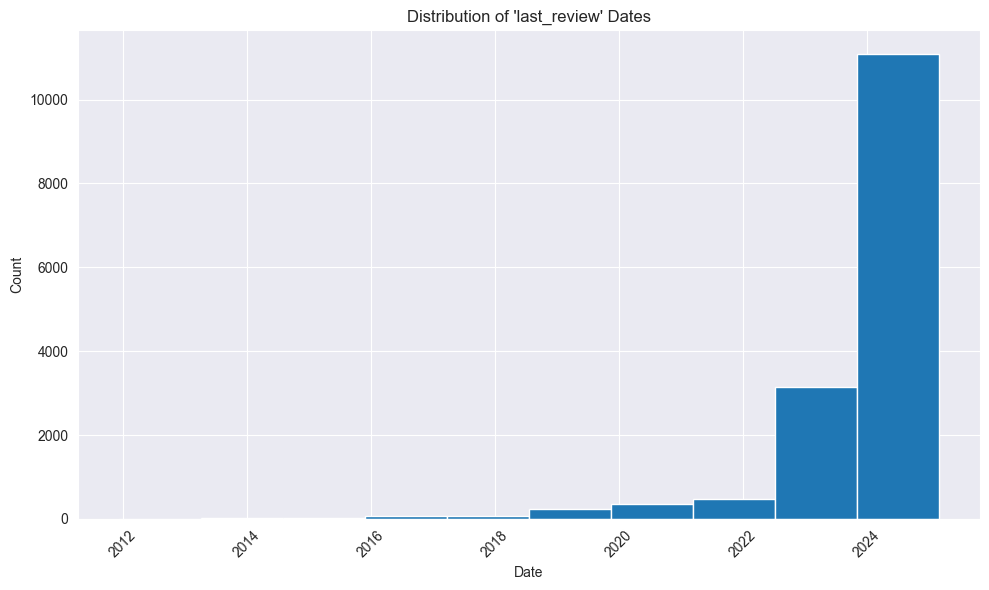

In [33]:
# 1. 'last_review' 컬럼을 datetime으로 변환 (숫자나 잘못된 포맷은 NaT로)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# 2. 변환 후 결측치 개수 확인 (원한다면)
print("NaT 개수:", df['last_review'].isna().mean())

# 3. 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(df['last_review'].dropna(), bins=10)
plt.title("Distribution of 'last_review' Dates")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
non_review = df[df['last_review'].isna() & df['number_of_review'] == 0]
non_review

KeyError: 'number_of_review'